# Import libraries

In [52]:
import pandas as pd
import numpy as np
import cmath
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [4]:
PATH = r'C:\Users\LIIAARC LAPTOP - 02\Desktop\Armband\Armband_matlab_files\Data\Data_6_12\Captura1'

# Reading Data

In [5]:
sensor_01 = np.loadtxt(PATH+'\sensor_1_1.txt')
sensor_02 = np.loadtxt(PATH+'\sensor_2_1.txt')
sensor_01 = sensor_01.reshape(1,len(sensor_01))
sensor_02 = sensor_02.reshape(1,len(sensor_02))
for i in range(9):
    # Cargando la data
    path_sensor_1 = '\sensor_1_'+str(i+2)+'.txt'
    path_sensor_2 = '\sensor_1_'+str(i+2)+'.txt'
    data_sensor_1 = np.loadtxt(PATH+path_sensor_1)
    data_sensor_2 = np.loadtxt(PATH+path_sensor_2)
    # Redimensionando la data a (8000,1)
    data_sensor_1 = data_sensor_1.reshape(1,len(data_sensor_1))
    data_sensor_2 = data_sensor_2.reshape(1,len(data_sensor_2))
    # Acumulando la data
    sensor_01 = np.concatenate([sensor_01,data_sensor_1],axis=0)
    sensor_02 = np.concatenate([sensor_02,data_sensor_2],axis=0)

# Funciones

In [6]:
# LECTURA DE DATOS DE UNA CARPETA
def read_data_semg(PATH):
    sensor_01 = np.loadtxt(PATH+'\sensor_1_1.txt')
    sensor_02 = np.loadtxt(PATH+'\sensor_2_1.txt')
    sensor_01 = sensor_01.reshape(1,len(sensor_01))
    sensor_02 = sensor_02.reshape(1,len(sensor_02))
    for i in range(9):
        # Cargando la data
        path_sensor_1 = '\sensor_1_'+str(i+2)+'.txt'
        path_sensor_2 = '\sensor_1_'+str(i+2)+'.txt'
        data_sensor_1 = np.loadtxt(PATH+path_sensor_1)
        data_sensor_2 = np.loadtxt(PATH+path_sensor_2)
        # Redimensionando la data a (8000,1)
        data_sensor_1 = data_sensor_1.reshape(1,len(data_sensor_1))
        data_sensor_2 = data_sensor_2.reshape(1,len(data_sensor_2))
        # Acumulando la data
        sensor_01 = np.concatenate([sensor_01,data_sensor_1],axis=0)
        sensor_02 = np.concatenate([sensor_02,data_sensor_2],axis=0)
    return sensor_01, sensor_02

# SUAVIZADO DE LA SEÑAL
def moving_average(NumTimePeriod,offset,data):
    mylist = data
    N = NumTimePeriod
    cumsum, moving_aves = [0], []
    
    for i, x in enumerate(mylist, 1):
        cumsum.append(cumsum[i-1] + x)
        if (((i-N)>=0) & ((i-N)%offset==0)):
            div = int((i-N)/offset)
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            moving_aves.append(moving_ave)
    return moving_aves

# EXTRACCIÓN DE CARACTERÍSTICAS DE LA SEÑAL PROCESADA

# Integrated emg
def iemg(emg):
    I=sum(np.abs(emg))
    return I

# Zero crossing
def ZC(emg,umbral):
    N=len(emg)
    product=np.multiply(emg[0:N-1],emg[1:N])
    dif=np.abs(emg[0:N-1]-emg[1:N])
    s=0
    for i in range(N-1):
        sgn=0
        dif_cond=0
        if(product[i]>=umbral):
            sgn=1
        if(dif[i]>=umbral):
            dif_cond=1
        s = s + (sgn*dif_cond)
    return s

# Wave length - Longitud de la onda
def WL(emg):
    N=len(emg)
    dif=emg[1:N]-emg[0:N-1]
    wl=sum(np.abs(dif))
    return wl

# Willison amplitude
def WAMP(emg,umbral):
    N=len(emg)
    dif=emg[1:N]-emg[0:N-1]
    dif_abs=np.abs(dif)
    s=0
    for i in range(N-1):
        if (dif_abs[i]>= umbral):
            s=s+1
    return s

# Mean Absolute Value
def mav(emg):
    N=len(emg)
    mav=(1/N)*sum(np.abs(emg))
    return mav

# Modified mean absolute value
def mmav1(emg):
    N=len(emg)
    suma=0.5*sum(np.abs(emg))+0.5*sum(np.abs(emg[int(0.25*N):int(0.75*N)]))
    mmav1=(1/N)*suma
    return mmav1

# Variance of EMG
def VAR(emg):
    N=len(emg)
    var=(1/(N-1))*sum(np.abs(emg)*np.abs(emg))
    return var

# Root Mean Square
def RMS(emg):
    N=len(emg)
    rms=np.sqrt((1/N)*sum(np.abs(emg)*np.abs(emg)))
    return rms

# LOG detector
def LOG(emg):
    N=len(emg)
    suma=sum(np.log(np.abs(emg)+0.01))
    LOG=np.exp(suma/N)
    return LOG

# Slope Sign Change
def SSC(emg,umbral):
    N=len(emg)
    dif1=emg[1:N-1]-emg[0:N-2]
    dif2=emg[1:N-1]-emg[2:N]
    product=np.multiply(dif1,dif2)
    s=0
    for i in range(N-2):
        if (product[i]>= umbral):
            s=s+1
    return s



# Plotting data

## Libre - primera captura

In [7]:
amplitud_sensor_01 = np.max(sensor_01,axis=1)
amplitud_sensor_02 = np.max(sensor_02,axis=1)

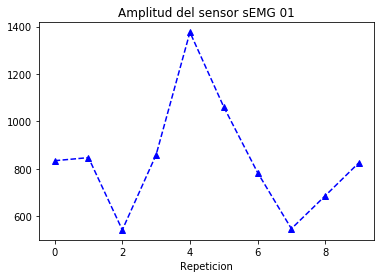

In [8]:
plt.plot(amplitud_sensor_01,'b^--');
plt.title('Amplitud del sensor sEMG 01');
plt.xlabel('Repeticion');

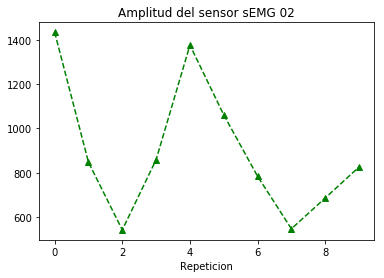

In [9]:
plt.plot(amplitud_sensor_02,'g^--');
plt.title('Amplitud del sensor sEMG 02');
plt.xlabel('Repeticion');

In [10]:
PATH_1 = r'C:\Users\LIIAARC LAPTOP - 02\Desktop\Armband\Armband_matlab_files\Data\Data_6_12\Captura1'

In [11]:
sensor_01_1, sensor_02_1 = read_data_semg(PATH_1)
amplitud_sensor_01_1 = np.max(sensor_01_1,axis=1)
amplitud_sensor_02_1 = np.max(sensor_02_1,axis=1)

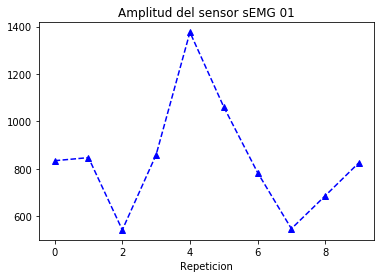

In [12]:
plt.plot(amplitud_sensor_01_1,'b^--');
plt.title('Amplitud del sensor sEMG 01');
plt.xlabel('Repeticion');

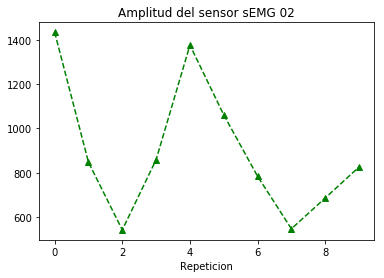

In [13]:
plt.plot(amplitud_sensor_02_1,'g^--');
plt.title('Amplitud del sensor sEMG 02');
plt.xlabel('Repeticion');

## Bolsa con peso - Segunda captura

In [14]:
PATH_2 = r'C:\Users\LIIAARC LAPTOP - 02\Desktop\Armband\Armband_matlab_files\Data\Data_6_12\Captura2'

In [15]:
sensor_01_2, sensor_02_2 = read_data_semg(PATH_2)
amplitud_sensor_01_2 = np.max(sensor_01_2,axis=1)
amplitud_sensor_02_2 = np.max(sensor_02_2,axis=1)

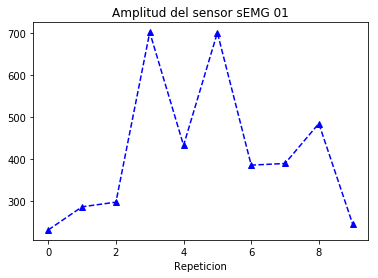

In [16]:
plt.plot(amplitud_sensor_01_2,'b^--');
plt.title('Amplitud del sensor sEMG 01');
plt.xlabel('Repeticion');

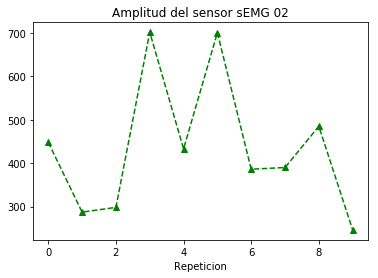

In [17]:
plt.plot(amplitud_sensor_02_2,'g^--');
plt.title('Amplitud del sensor sEMG 02');
plt.xlabel('Repeticion');

## Mochila con peso - Tercera captura

In [18]:
PATH_3 = r'C:\Users\LIIAARC LAPTOP - 02\Desktop\Armband\Armband_matlab_files\Data\Data_7_12\Captura1'

In [19]:
sensor_01_3, sensor_02_3 = read_data_semg(PATH_3)

In [20]:
amplitud_sensor_01_3 = np.max(sensor_01_3,axis=1)
amplitud_sensor_02_3 = np.max(sensor_02_3,axis=1)

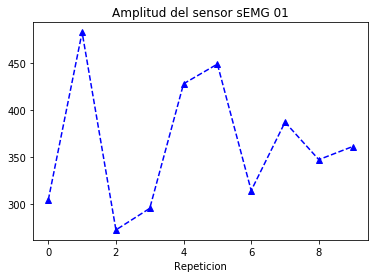

In [21]:
plt.plot(amplitud_sensor_01_3,'b^--');
plt.title('Amplitud del sensor sEMG 01');
plt.xlabel('Repeticion');

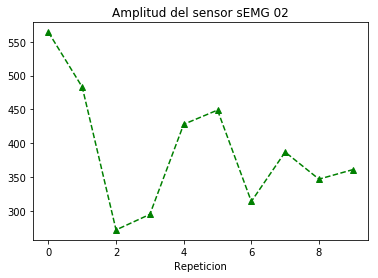

In [22]:
plt.plot(amplitud_sensor_02_3,'g^--');
plt.title('Amplitud del sensor sEMG 02');
plt.xlabel('Repeticion');

## MOVING AVERAGE WITH SLIDING WINDOW

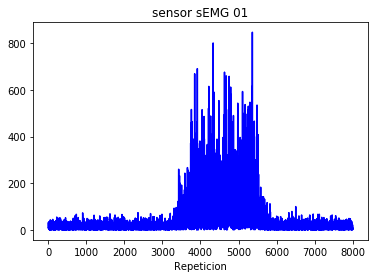

In [23]:
plt.plot(sensor_01[1],'b');
plt.title('sensor sEMG 01');
plt.xlabel('Repeticion');

In [24]:
# Moving average
sensor_01_ma = moving_average(50,25,sensor_01[1])

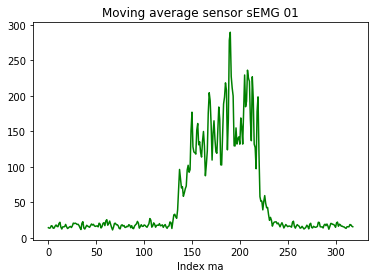

In [25]:
plt.plot(sensor_01_ma,'g');
plt.title('Moving average sensor sEMG 01');
plt.xlabel('Index ma');

## ANÁLISIS EN FRECUENCIA DE LA SEÑAL

In [26]:
data = sensor_01[8]

### TRANSFORMADA RÁPIDA DE FOURIER

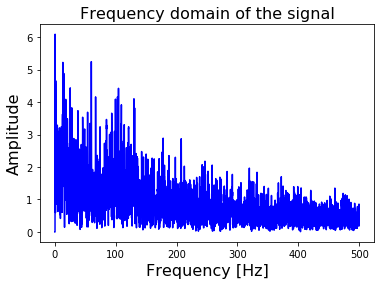

In [27]:
from scipy.fftpack import fft
 
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values
 
t_n = 8
N = 8000
T = t_n / N
f_s = 1/T

composite_y_value = data
f_values, fft_values = get_fft_values(composite_y_value, T, N, f_s)
 
fft_values[0:4] = 0 # En frecuencias cercanas a cero presenta una alta amplitud. Why?
plt.plot(f_values, fft_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.show()

### POWER SPECTRAL DENSITY

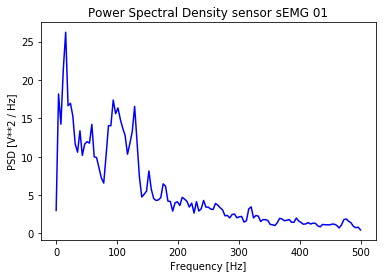

In [28]:
from scipy.signal import welch
 
def get_psd_values(y_values, T, N, f_s):
    f_values, psd_values = welch(y_values, fs=f_s)
    return f_values, psd_values
 
 
t_n = 8 # 8 segundos
N = 8000 # Número de muestras
T = t_n / N # Periodo de muestreo
f_s = 1/T # Frecuencia de muestreo
 
f_values, psd_values = get_psd_values(composite_y_value, T, N, f_s)
 
plt.plot(f_values, psd_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2 / Hz]')
plt.title('Power Spectral Density sensor sEMG 01');
plt.show()

### FUNCIONES DE GENERACIÓN DE DATA TRANSFORMADA - MA - PSD

In [29]:
def generate_ma_data(data, NumPeriod, Overlap):
    data_ma_list = []
    for serie in data:
        data_ma_list.append(moving_average(NumPeriod,Overlap,serie))
    return data_ma_list

def generate_psd_data(data,T,N,f_s):
    data_psd_list = []
    data_f_list = []
    for serie in data:
        f_values, psd_values = get_psd_values(serie,T,N,f_s)
        data_psd_list.append(psd_values)
        data_f_list.append(f_values)
    data_psd_total = [data_f_list, data_psd_list]
    return data_psd_total

In [30]:
ma_sensor_01_1 = generate_ma_data(sensor_01_1, 50, 25)

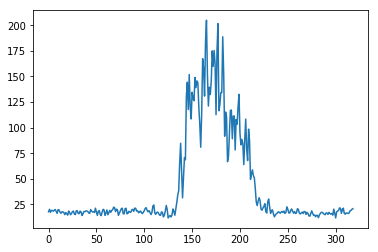

In [31]:
plt.plot(ma_sensor_01_1[9])

In [32]:
t_n = 8 # 8 segundos
N = 8000 # Número de muestras
T = t_n / N # Periodo de muestreo
f_s = 1/T # Frecuencia de muestreo

psd_sensor_01_1 = generate_psd_data(sensor_01_1,T,N,f_s)
# result[index_f_or_psd_value][index_repetition]
# index_f_or_psd_value = [0 or 1]
# index_repetition = [0 to 9]

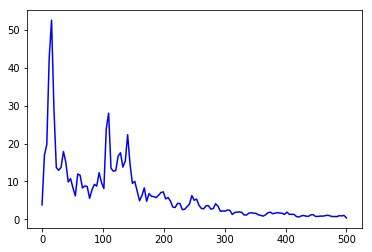

In [33]:
plt.plot(psd_sensor_01_1[0][0], psd_sensor_01_1[1][0], linestyle='-', color='blue')

### SANDRO - PRUEBA - LIBRE - POSICIÓN FOREARM

In [34]:
PATH_4 = r'C:\Users\LIIAARC LAPTOP - 02\Desktop\Armband\Armband_matlab_files\Data\Data_19_12\Captura1'

In [35]:
sensor_01_4, sensor_02_4 = read_data_semg(PATH_4)
amplitud_sensor_01_4 = np.max(sensor_01_4,axis=1)
amplitud_sensor_02_4 = np.max(sensor_02_4,axis=1)

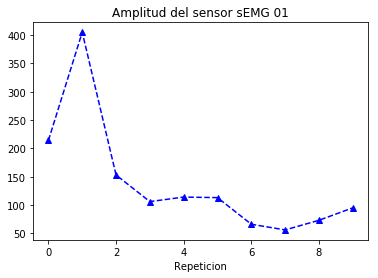

In [36]:
plt.plot(amplitud_sensor_01_4,'b^--');
plt.title('Amplitud del sensor sEMG 01');
plt.xlabel('Repeticion');

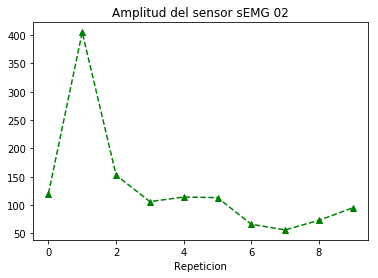

In [37]:
plt.plot(amplitud_sensor_02_4,'g^--');
plt.title('Amplitud del sensor sEMG 02');
plt.xlabel('Repeticion');

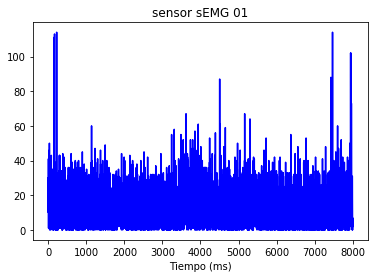

In [50]:
plt.plot(sensor_01_4[4],'b');
plt.title('sensor sEMG 01');
plt.xlabel('Tiempo (ms)');

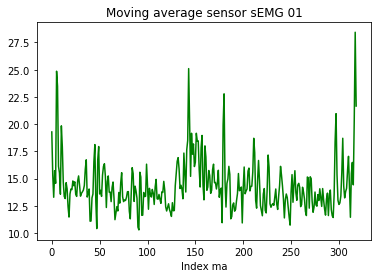

In [51]:
# Moving average
sensor_01_4_ma = moving_average(50,25,sensor_01_4[4])

plt.plot(sensor_01_4_ma,'g');
plt.title('Moving average sensor sEMG 01');
plt.xlabel('Index ma');

##### NOTA:

El sujeto que realizo el ensayo tuvo un error al seguir el protocolo, lo que al realizar un movimiento no debido y generar un deslizamiento de los electrodos introdujo error en los sensores sEMG.

Es un aspecto importante a considerar si se quiere establecer un prototipo que funciones en escenarios de atletas, para ello se debe considerar una distribución correcta de tensión en la banda para evitar el deslizamiento de los electrodos. 

### GENERACIÓN DE LA DATA PROCESADA DE LAS TRES REPETICIONES

In [54]:
# MOVING AVERAGE DATA
ma_sensor_01_1 = generate_ma_data(sensor_01_1, 50, 25)
ma_sensor_02_1 = generate_ma_data(sensor_02_1, 50, 25)
ma_sensor_01_2 = generate_ma_data(sensor_01_2, 50, 25)
ma_sensor_02_2 = generate_ma_data(sensor_02_2, 50, 25)
ma_sensor_01_3 = generate_ma_data(sensor_01_3, 50, 25)
ma_sensor_02_3 = generate_ma_data(sensor_02_3, 50, 25)

# POWER SPECTRUM DENSITY
t_n = 8 # 8 segundos
N = 8000 # Número de muestras
T = t_n / N # Periodo de muestreo
f_s = 1/T # Frecuencia de muestreo

psd_sensor_01_1 = generate_psd_data(sensor_01_1,T,N,f_s)
psd_sensor_02_1 = generate_psd_data(sensor_02_1,T,N,f_s)
psd_sensor_01_2 = generate_psd_data(sensor_01_2,T,N,f_s)
psd_sensor_02_2 = generate_psd_data(sensor_02_2,T,N,f_s)
psd_sensor_01_3 = generate_psd_data(sensor_01_3,T,N,f_s)
psd_sensor_02_3 = generate_psd_data(sensor_02_3,T,N,f_s)

#### MOSTRANDO LA DISTRIBUCIÓN DE LA AMPLITUD DE LA SEÑAL MA

In [63]:
# Generación de las amplitudes
amplitud_ma_01_1 = np.max(ma_sensor_01_1,axis =1)
amplitud_ma_02_1 = np.max(ma_sensor_02_1,axis =1)
amplitud_ma_01_2 = np.max(ma_sensor_01_2,axis =1)
amplitud_ma_02_2 = np.max(ma_sensor_02_2,axis =1)
amplitud_ma_01_3 = np.max(ma_sensor_01_3,axis =1)
amplitud_ma_02_3 = np.max(ma_sensor_02_3,axis =1)

###### FUNCION DE REGRESIÓN LINEAL

In [177]:
def linear_regression_line(data):
    x = np.array(range(10))+1
    coef = np.polyfit(x,data,1)
    result = coef[0]*x + coef[1]
    return result

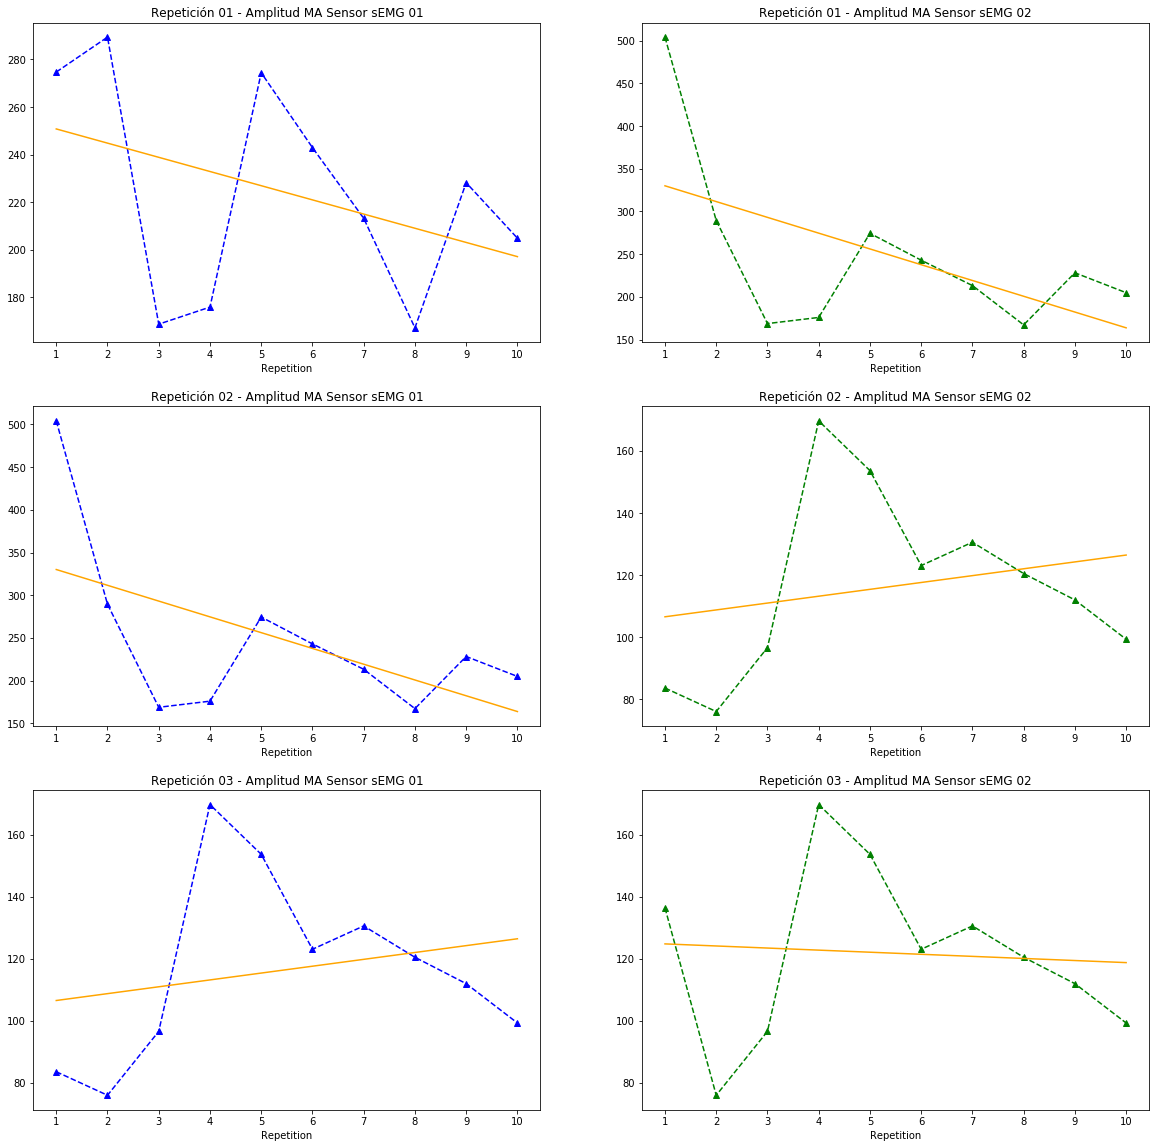

In [180]:
# Plot de la amplitud de la señal procesada por media móvil 
amplitud_data = [amplitud_ma_01_1, amplitud_ma_02_1, amplitud_ma_01_2, amplitud_ma_02_2, amplitud_ma_01_3, amplitud_ma_02_3]
fig, axes = plt.subplots(3,2, figsize = (20,20))
count = 0
colors = ['b^--','g^--']
xlab = np.array(range(10))+1
for i in range(3):
    for j in range(2):
        title = 'Repetición 0'+str(i+1)+' - Amplitud MA Sensor sEMG 0'+str(j+1)
        axes[i][j].plot(xlab,amplitud_data[i+j],colors[j]);
        y_reg = linear_regression_line(amplitud_data[i+j])
        axes[i][j].plot(xlab,y_reg,'orange')
        axes[i][j].set_title(title);
        axes[i][j].set_xlabel('Repetition');
        axes[i][j].set_xticks(ticks = xlab);

#### ANALIZANDO PARÁMETROS DE LA DENSIDAD DEL ESPECTRO DE POTENCIA

##### PICO PSD

In [139]:
pico_psd_01_1 = np.max(psd_sensor_01_1[1],axis =1)
pico_psd_02_1 = np.max(psd_sensor_02_1[1],axis =1)
pico_psd_01_2 = np.max(psd_sensor_01_2[1],axis =1)
pico_psd_02_2 = np.max(psd_sensor_02_2[1],axis =1)
pico_psd_01_3 = np.max(psd_sensor_01_3[1],axis =1)
pico_psd_02_3 = np.max(psd_sensor_02_3[1],axis =1)

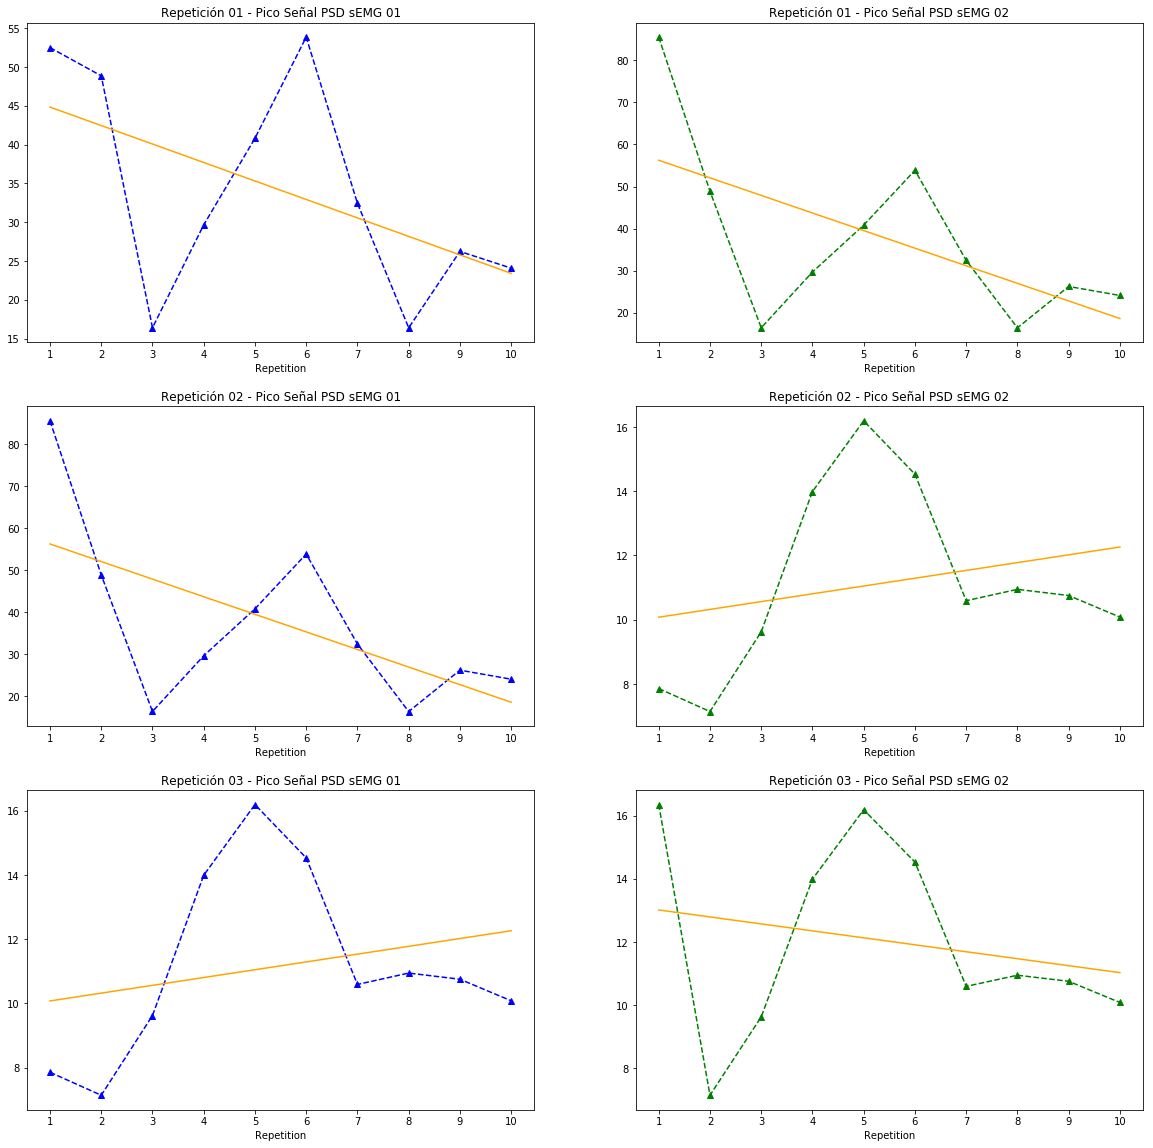

In [181]:
# Plot de los picos de la densidad del espectro de potencia de las señales 
pico_data = [pico_psd_01_1, pico_psd_02_1, pico_psd_01_2, pico_psd_02_2, pico_psd_01_3, pico_psd_02_3]
fig, axes = plt.subplots(3,2, figsize = (20,20))
count = 0
colors = ['b^--','g^--']
xlab = np.array(range(10))+1
for i in range(3):
    for j in range(2):
        title = 'Repetición 0'+str(i+1)+' - Pico Señal PSD sEMG 0'+str(j+1)
        axes[i][j].plot(xlab,pico_data[i+j],colors[j]);
        y_reg = linear_regression_line(pico_data[i+j])
        axes[i][j].plot(xlab,y_reg,'orange')
        axes[i][j].set_title(title);
        axes[i][j].set_xlabel('Repetition');
        axes[i][j].set_xticks(ticks = xlab);

##### MEAN PSD

In [146]:
mean_psd_01_1 = np.mean(psd_sensor_01_1[1],axis =1)
mean_psd_02_1 = np.mean(psd_sensor_02_1[1],axis =1)
mean_psd_01_2 = np.mean(psd_sensor_01_2[1],axis =1)
mean_psd_02_2 = np.mean(psd_sensor_02_2[1],axis =1)
mean_psd_01_3 = np.mean(psd_sensor_01_3[1],axis =1)
mean_psd_02_3 = np.mean(psd_sensor_02_3[1],axis =1)

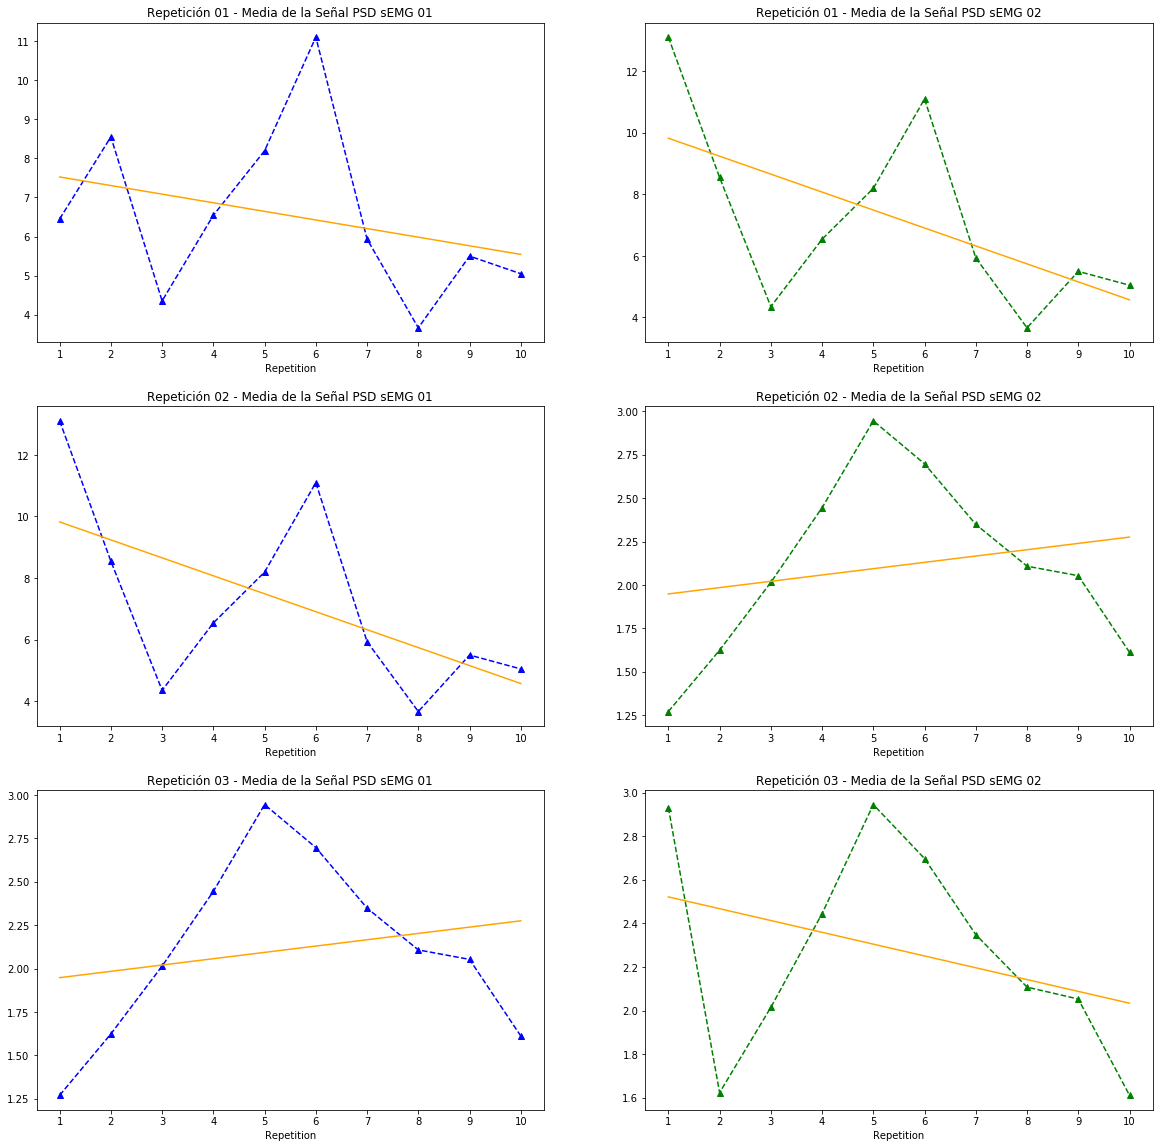

In [182]:
# Plot de la media de la densidad del espectro de potencia de las señales  
mean_data = [mean_psd_01_1, mean_psd_02_1, mean_psd_01_2, mean_psd_02_2, mean_psd_01_3, mean_psd_02_3]
fig, axes = plt.subplots(3,2, figsize = (20,20))
count = 0
colors = ['b^--','g^--']
xlab = np.array(range(10))+1
for i in range(3):
    for j in range(2):
        title = 'Repetición 0'+str(i+1)+' - Media de la Señal PSD sEMG 0'+str(j+1)
        axes[i][j].plot(xlab,mean_data[i+j],colors[j]);
        y_reg = linear_regression_line(mean_data[i+j])
        axes[i][j].plot(xlab,y_reg,'orange')
        axes[i][j].set_title(title);
        axes[i][j].set_title(title);
        axes[i][j].set_xlabel('Repetition');
        axes[i][j].set_xticks(ticks = xlab);

##### MEDIAN PSD

In [149]:
median_psd_01_1 = np.median(psd_sensor_01_1[1],axis =1)
median_psd_02_1 = np.median(psd_sensor_02_1[1],axis =1)
median_psd_01_2 = np.median(psd_sensor_01_2[1],axis =1)
median_psd_02_2 = np.median(psd_sensor_02_2[1],axis =1)
median_psd_01_3 = np.median(psd_sensor_01_3[1],axis =1)
median_psd_02_3 = np.median(psd_sensor_02_3[1],axis =1)

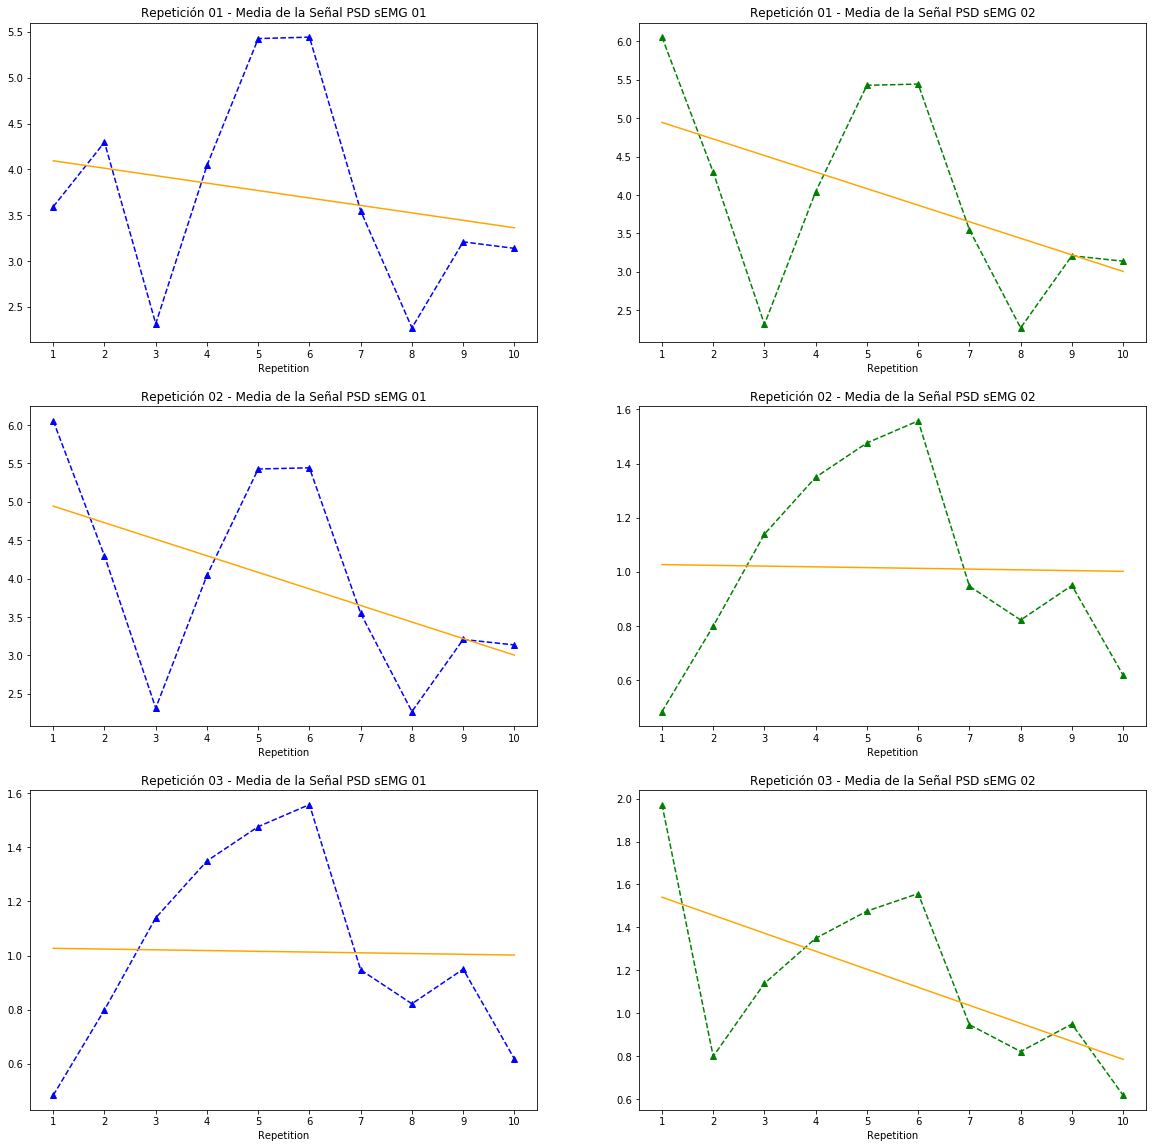

In [184]:
# Plot de la mediana de la densidad del espectro de potencia de las señales 
median_data = [median_psd_01_1, median_psd_02_1, median_psd_01_2, median_psd_02_2, median_psd_01_3, median_psd_02_3]
fig, axes = plt.subplots(3,2, figsize = (20,20))
count = 0
colors = ['b^--','g^--']
xlab = np.array(range(10))+1
for i in range(3):
    for j in range(2):
        title = 'Repetición 0'+str(i+1)+' - Media de la Señal PSD sEMG 0'+str(j+1)
        axes[i][j].plot(xlab,median_data[i+j],colors[j]);
        y_reg = linear_regression_line(median_data[i+j])
        axes[i][j].plot(xlab,y_reg,'orange')
        axes[i][j].set_title(title);
        axes[i][j].set_title(title);
        axes[i][j].set_xlabel('Repetition');
        axes[i][j].set_xticks(ticks = xlab);

##### PLOT DE LA SEÑAL MA DE LAS REPETICIONES

In [242]:
def plot_all_signals(data_semg1,data_semg2,tipo,xlab):
    fig, axes = plt.subplots(10,2, figsize = (15,20))
    for i in range(10):
        title1 = 'R'+str(i+1)+' '+tipo + ' sEMG 01'
        title2 = 'R'+str(i+1)+' '+tipo + ' sEMG 02'
        axes[i][0].plot(data_semg1[i],'b');
        axes[i][0].set_title(title1);
        axes[i][0].set_xlabel(xlab);
    
        axes[i][1].plot(data_semg2[i],'g');
        axes[i][1].set_title(title2);
        axes[i][1].set_xlabel(xlab);
    plt.subplots_adjust(hspace=1, wspace=0.15)
# Tipo: Señal, MA, PSD

def plot_psd_signals(data_semg1,data_semg2,tipo):
    fig, axes = plt.subplots(10,2, figsize = (15,20))
    for i in range(10):
        title1 = 'R'+str(i+1)+' '+tipo + ' sEMG 01'
        title2 = 'R'+str(i+1)+' '+tipo + ' sEMG 02'
        axes[i][0].plot(data_semg1[0][i],data_semg1[1][i],'b');
        axes[i][0].set_title(title1);
        axes[i][0].set_xlabel('Frequency [Hz]');
        axes[i][0].set_ylabel('PSD [V**2 / Hz]')
    
        axes[i][1].plot(data_semg2[0][i],data_semg1[1][i],'g');
        axes[i][1].set_title(title2);
        axes[i][1].set_xlabel('Frequency [Hz]');
        axes[i][1].set_ylabel('PSD [V**2 / Hz]')
    plt.subplots_adjust(hspace=1, wspace=0.15)
    
    

##### SERIE DE REPETICIONES 01

##### Señal Raw (Señal Pura)

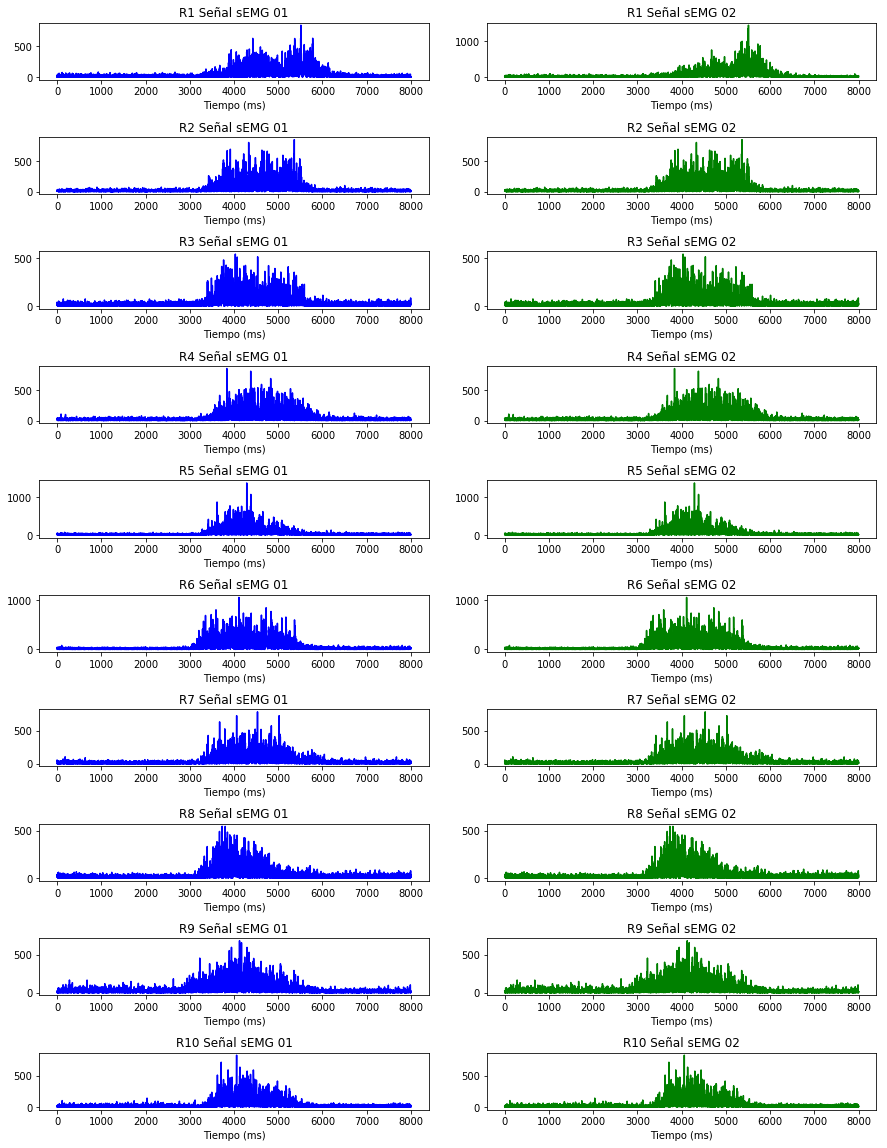

In [243]:
plot_all_signals(sensor_01_1,sensor_02_1,tipo = 'Señal',xlab = 'Tiempo (ms)')

##### Moving Average de la señal

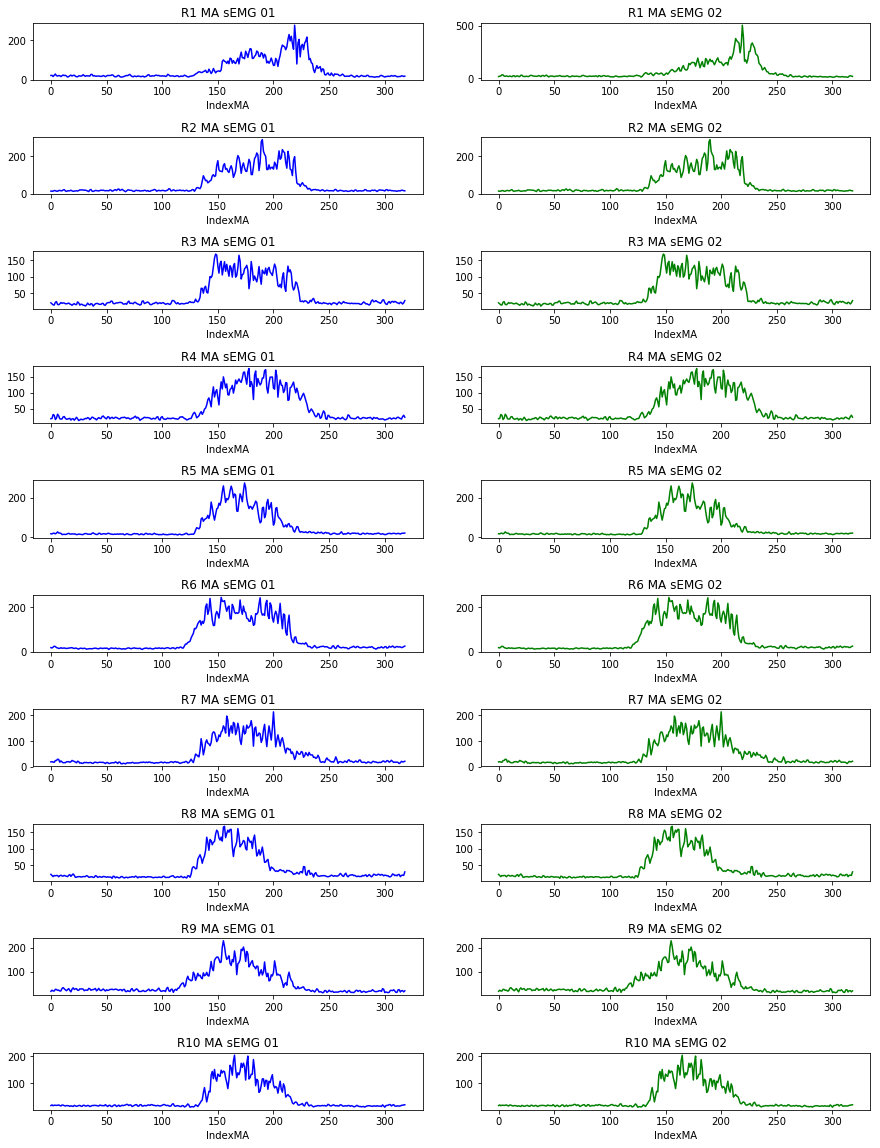

In [244]:
plot_all_signals(ma_sensor_01_1,ma_sensor_02_1,tipo = 'MA',xlab = 'IndexMA')

##### Densidad Espectral de Potencia de la señal

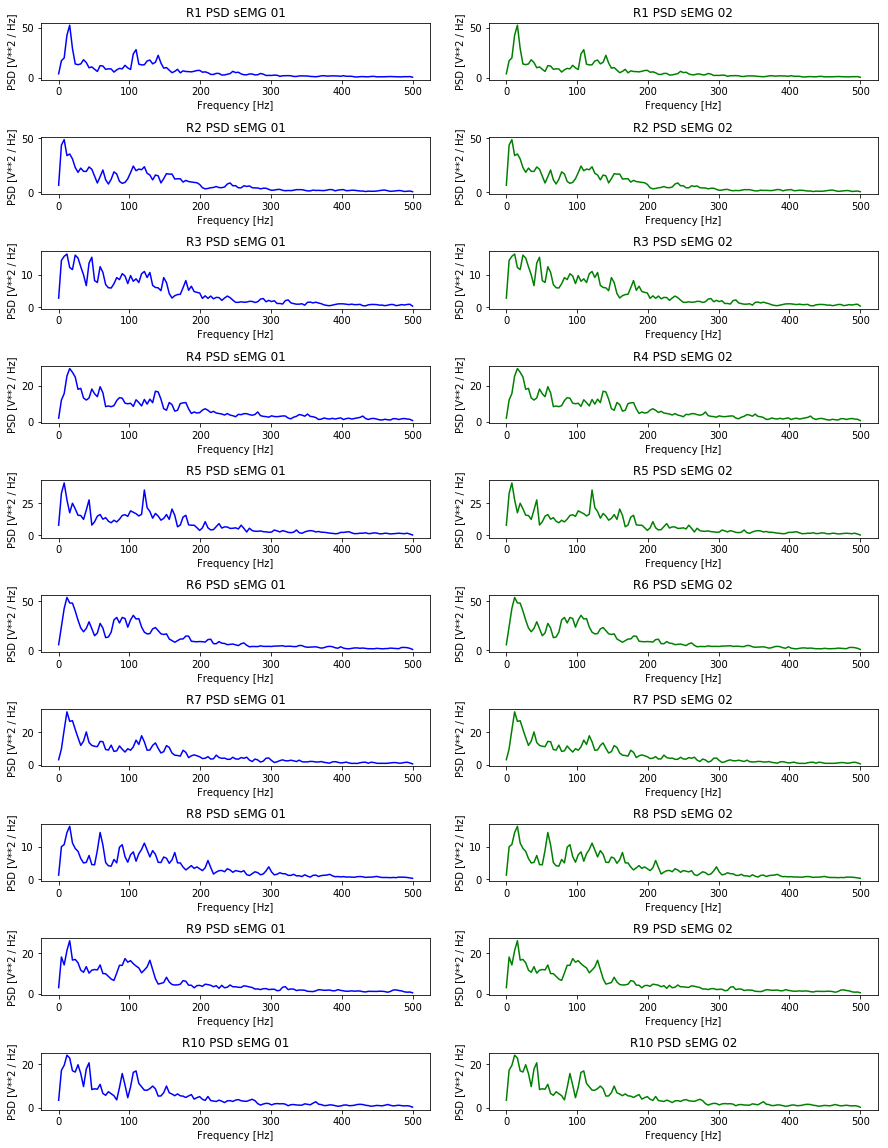

In [245]:
plot_psd_signals(psd_sensor_01_1,psd_sensor_02_1,'PSD')

##### REPETICIÓN 02

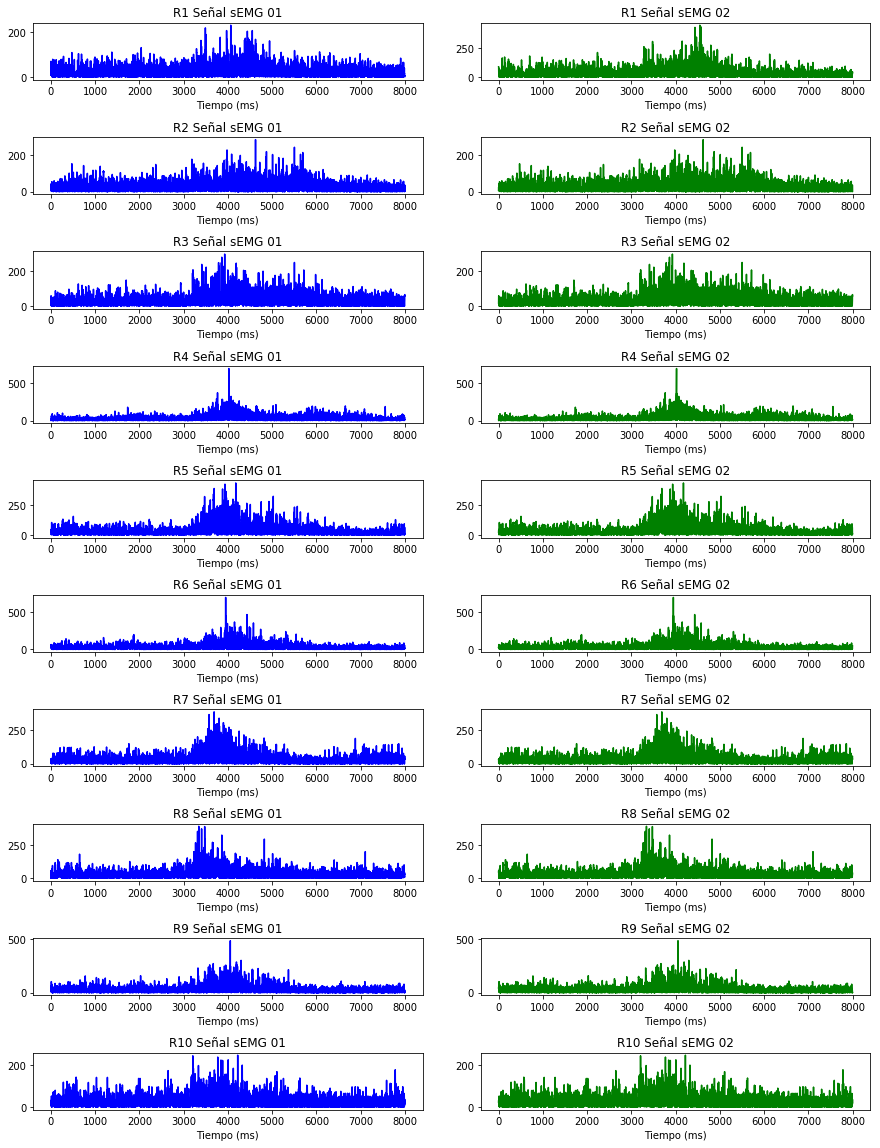

In [246]:
plot_all_signals(sensor_01_2,sensor_02_2,tipo = 'Señal',xlab = 'Tiempo (ms)')

##### Moving Average de la señal

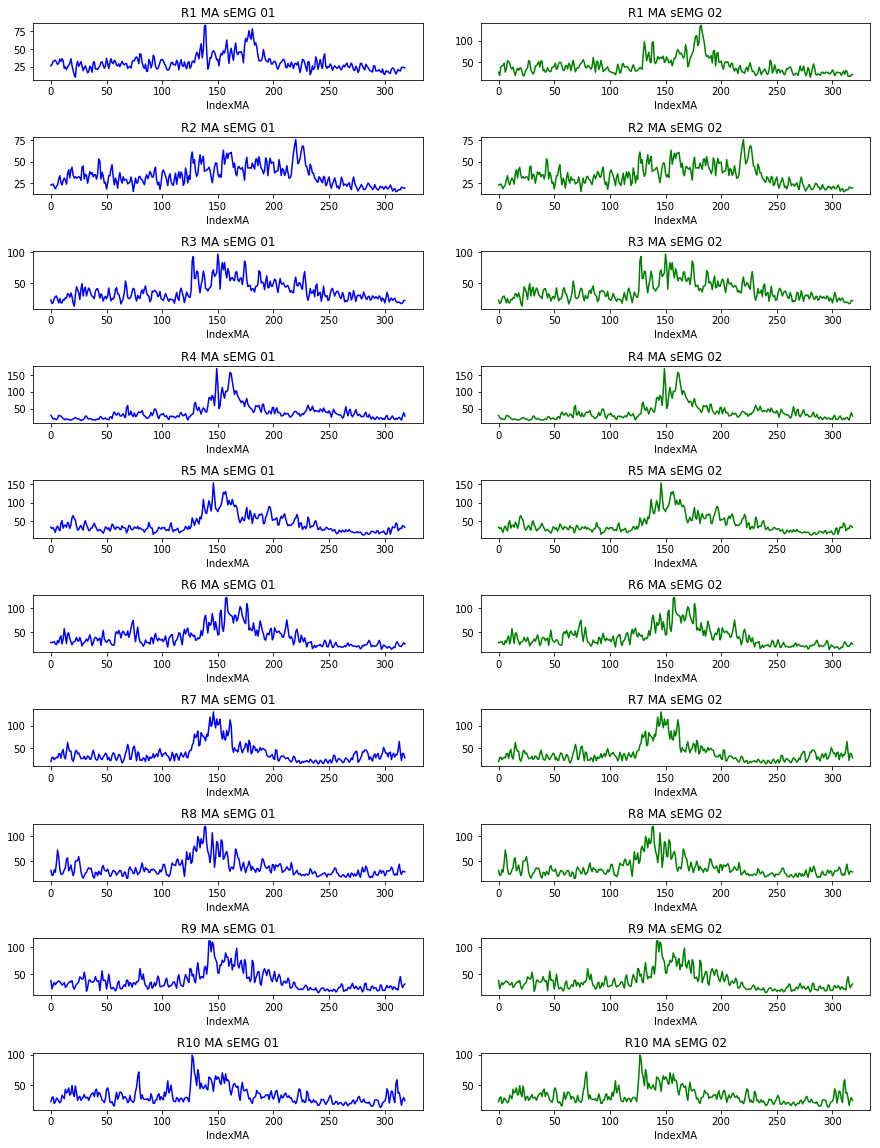

In [247]:
plot_all_signals(ma_sensor_01_2,ma_sensor_02_2,tipo = 'MA',xlab = 'IndexMA')

##### Densidad Espectral de Potencia de la señal

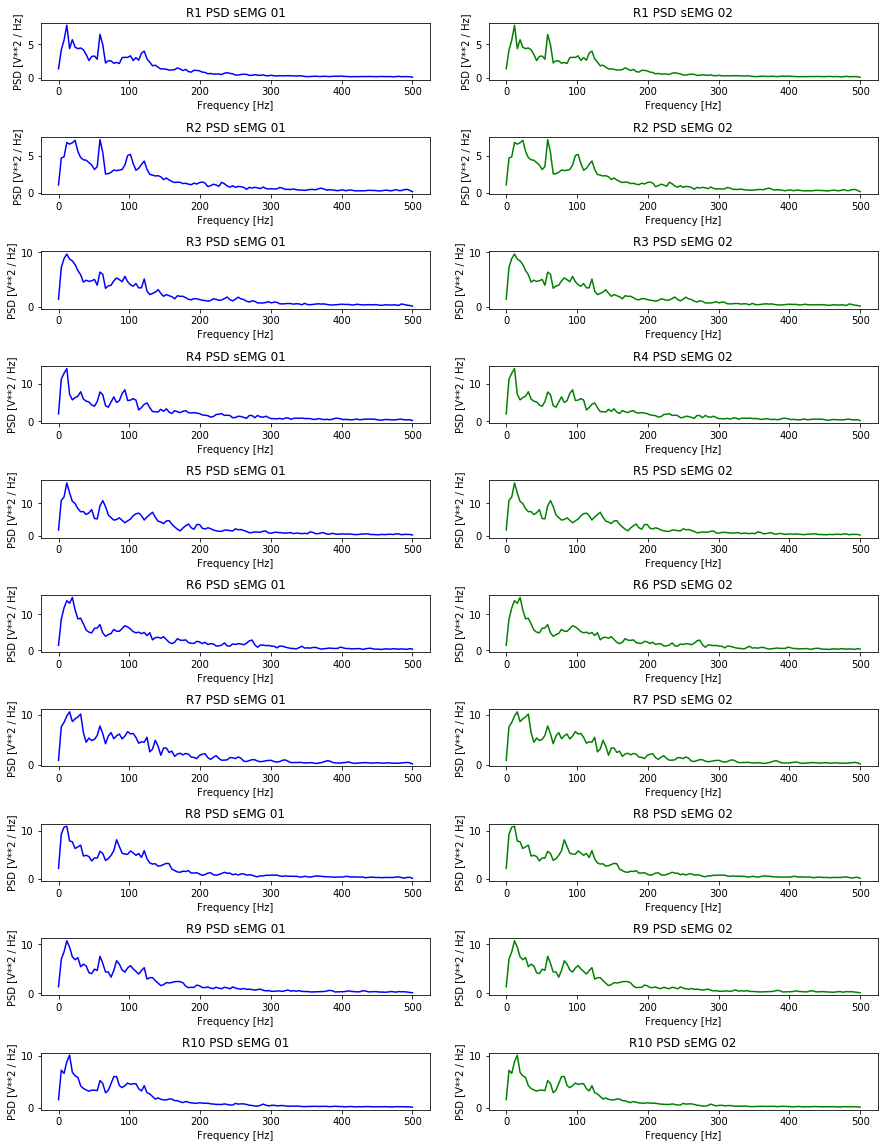

In [248]:
plot_psd_signals(psd_sensor_01_2,psd_sensor_02_2,'PSD')

##### REPETICIÓN 03

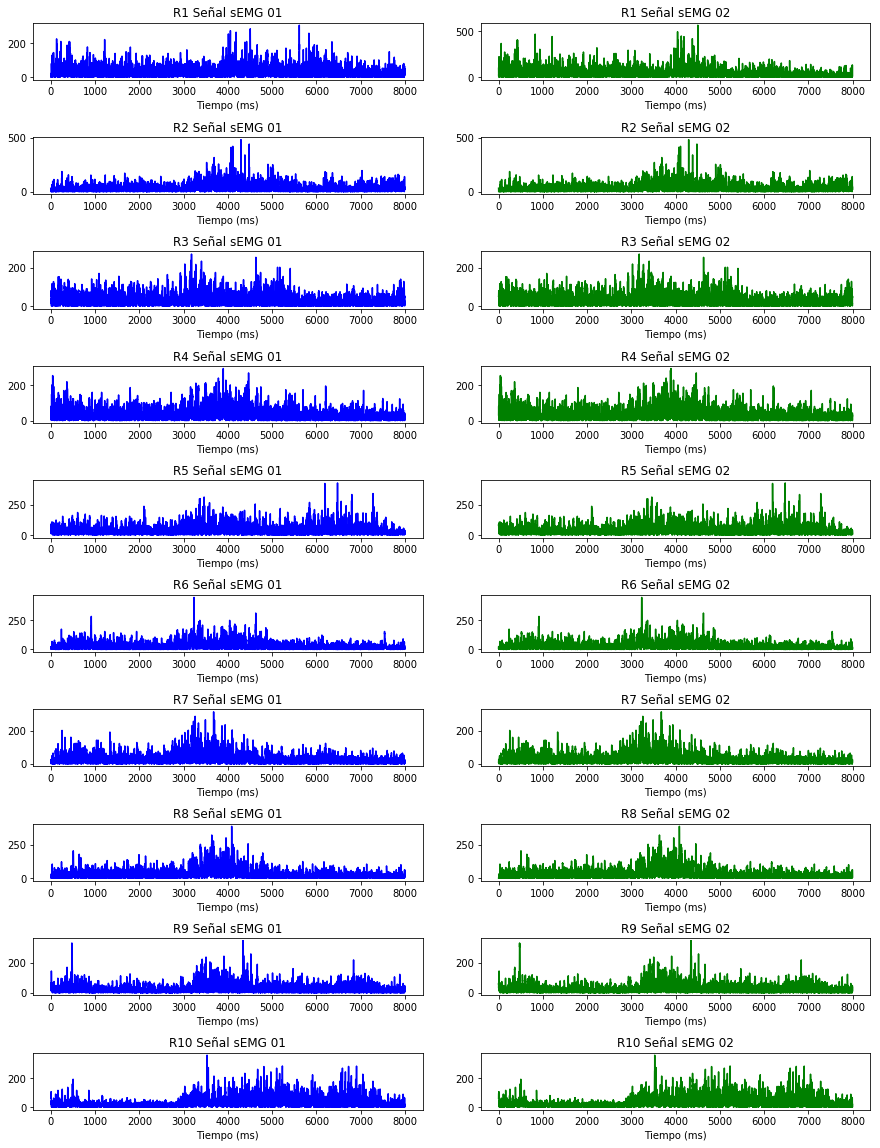

In [249]:
plot_all_signals(sensor_01_3,sensor_02_3,tipo = 'Señal',xlab = 'Tiempo (ms)')

##### Moving Average de la señal

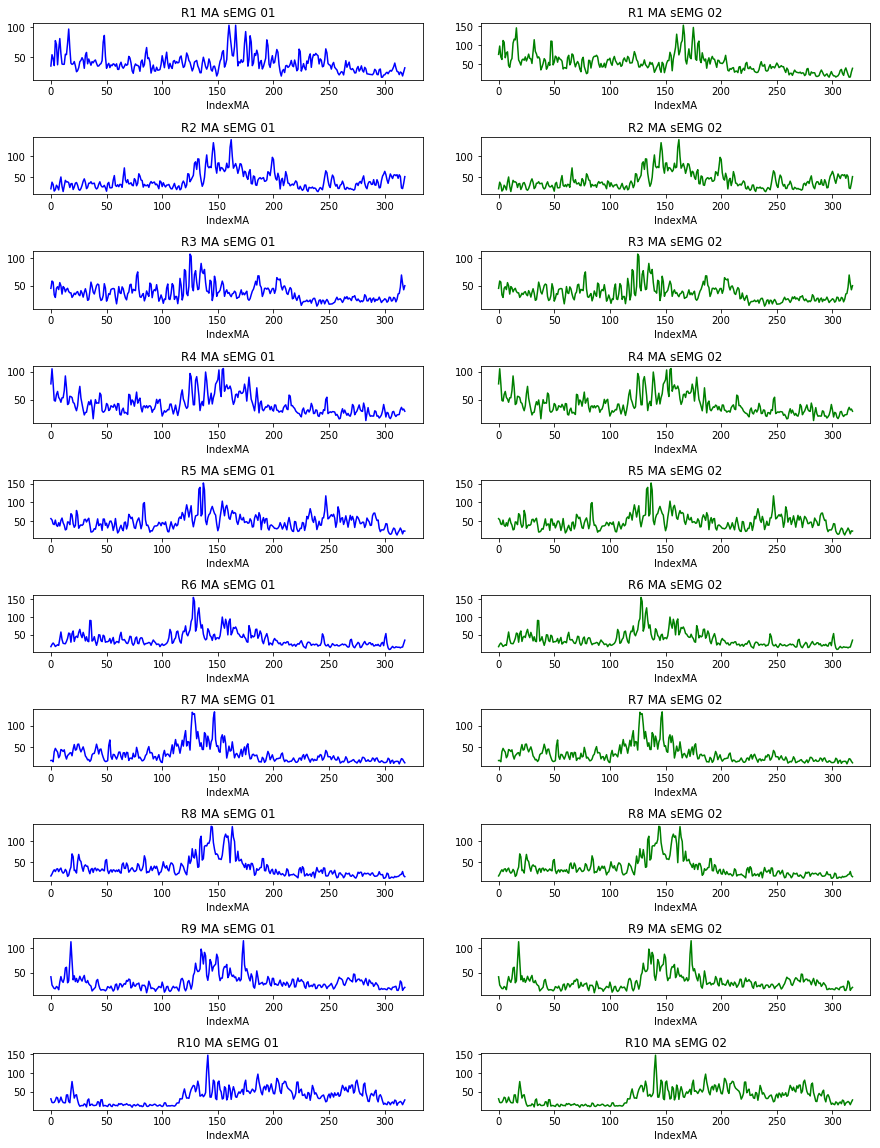

In [250]:
plot_all_signals(ma_sensor_01_3,ma_sensor_02_3,tipo = 'MA',xlab = 'IndexMA')

##### Densidad Espectral de Potencia de la señal

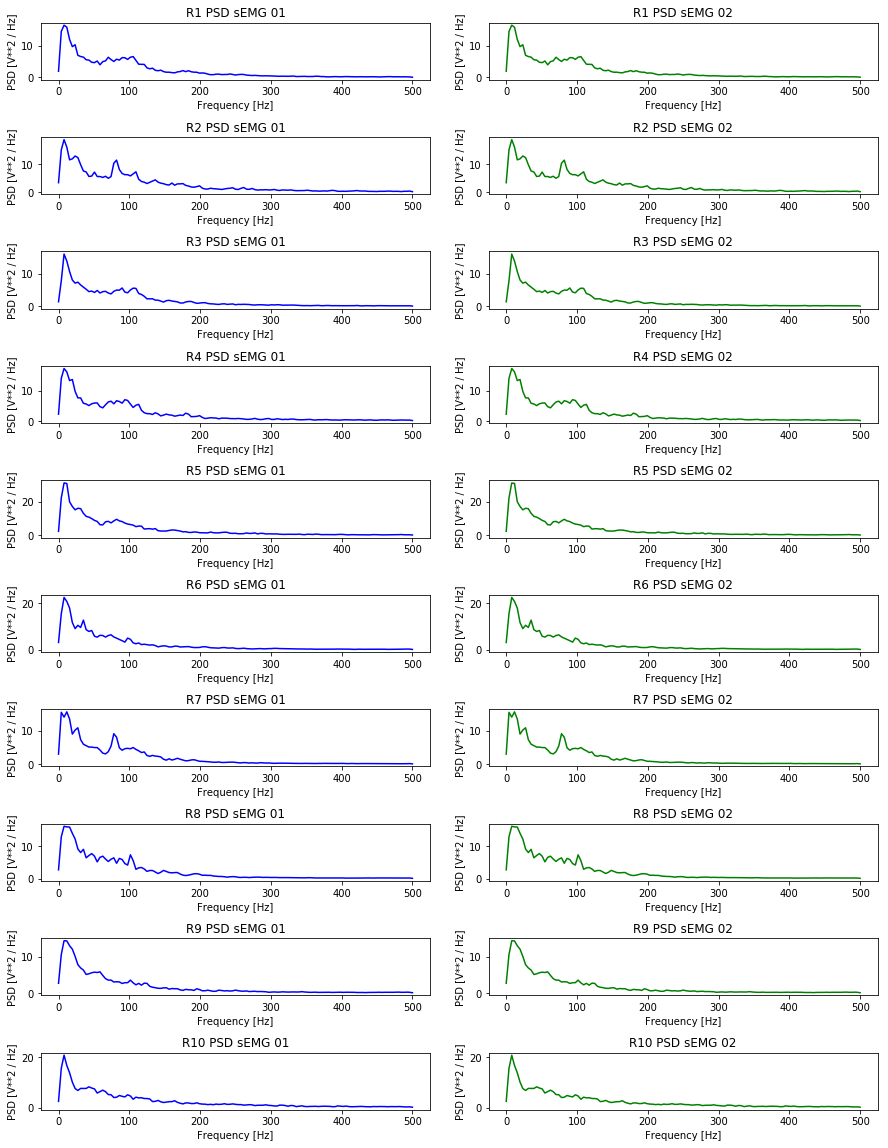

In [251]:
plot_psd_signals(psd_sensor_01_3,psd_sensor_02_3,'PSD')